In [1]:
from torchvision import models

In [2]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [3]:
resnet = models.resnet101(pretrained=True)

/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /Users/jiaronghe/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

In [4]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [6]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485,0.456,0.406],
    std=[0.229,0.224,0.225]
    )
])

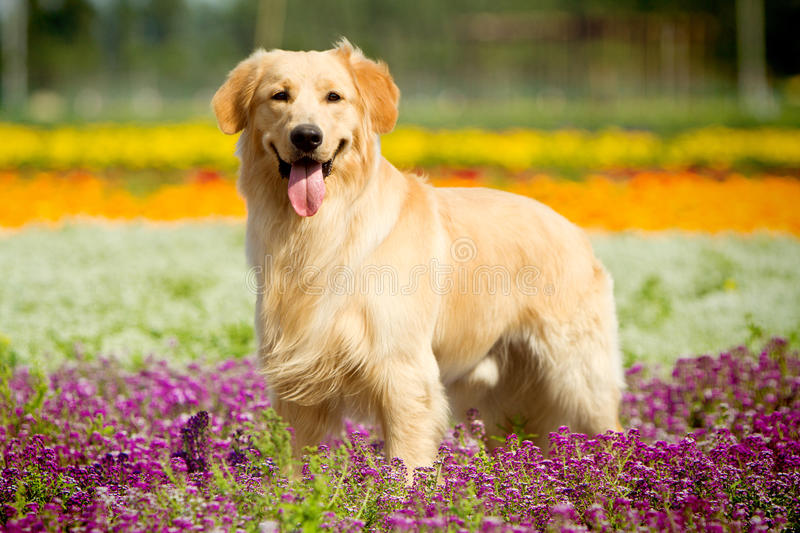

In [17]:
from PIL import Image
img = Image.open('/Users/jiaronghe/Downloads/golden-retriever-dog-21668976.jpeg')
img

In [18]:
img_t = preprocess(img)

In [19]:
import torch
batch_t = torch.unsqueeze(img_t,0)

In [20]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
out = resnet(batch_t)
out

tensor([[-2.9728e+00, -1.3784e+00, -3.7567e+00, -4.2517e+00, -4.0046e+00,
         -3.4021e+00, -4.1799e+00, -1.6052e+00, -3.6133e-01, -3.2968e+00,
         -1.3493e-01,  1.9553e+00, -1.5975e+00, -5.9003e-01, -1.4478e+00,
         -1.7926e+00,  6.3184e-02,  5.2231e-01,  3.6428e-01, -3.6895e-01,
         -1.8094e+00, -3.1158e+00, -1.1893e+00, -5.4983e-01, -1.5484e+00,
          1.4938e+00, -1.4777e+00, -3.3287e-01, -1.5285e+00, -1.5187e+00,
         -2.0804e+00, -1.8512e+00, -2.0644e+00, -2.7421e+00, -2.5007e+00,
         -2.4816e+00, -2.1725e+00, -1.7570e+00, -9.8571e-01, -1.0096e+00,
         -6.3621e-01, -1.5188e+00,  5.2690e-01, -2.2916e+00, -3.7505e-01,
         -1.7993e+00,  9.4060e-01,  4.4345e-01, -2.1815e+00, -3.6444e-01,
         -1.6565e+00, -3.2964e+00, -7.8250e-01, -2.2336e+00, -1.5150e+00,
         -9.8628e-01, -2.8555e+00, -7.7984e-01, -2.2763e+00,  2.2774e-01,
          1.8881e-01, -2.9088e+00, -1.1143e+00, -2.3469e+00, -2.2960e+00,
         -1.7549e+00, -8.3505e-01, -4.

In [22]:
with open('/Users/jiaronghe/Desktop/DigitalXi/askAVet/pytorch-project/data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [23]:
_, index = torch.max(out, 1)

In [24]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 97.2980728149414)

In [25]:
_, indices = torch.sort(out,descending=True)
[(labels[idx],percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 97.2980728149414),
 ('Labrador retriever', 1.0458747148513794),
 ('tennis ball', 0.24664995074272156),
 ('clumber, clumber spaniel', 0.11698247492313385),
 ('Norfolk terrier', 0.10791206359863281)]